# ◆분석목표

### 1. MZ세대와 기성세대의 비교를 통한 MZ세대의 금융 특성 파악하기
### 2. 클러스터링을 통해 MZ세대를 비슷한 특성으로 군집화시키고 군집마다의 특성을 파악한다.


## ◆사용한 모듈

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family']='Malgun Gothic' #한글 깨짐 해결
pd.options.display.float_format = '{:.5f}'.format



## ◆데이터 결합

In [2]:
fd1=pd.read_excel('d:\\data2\\신한\\finance_data201903.xlsx')

In [3]:
fd2=pd.read_excel('d:\\data2\\신한\\finance_data201909.xlsx')

In [4]:
fd3=pd.read_excel('d:\\data2\\신한\\finance_data202003.xlsx')

In [5]:
fd4=pd.read_excel('d:\\data2\\신한\\finance_data202009.xlsx')

In [6]:
fd5=pd.read_excel('d:\\data2\\신한\\finance_data202103.xlsx')

In [7]:
df=pd.concat([fd1,fd2,fd3,fd4,fd5],axis=0)
df.head()

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1123064010001,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1123064010001,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1123064010001,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1123064010001,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1123064010001,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


## ◆결측치 확인

In [8]:
df.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

## ◆명목형 변수 확인

In [9]:
df[df.columns[df.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
지역구,1039568,25,송파구,68405
법정동,1039568,451,신림동,27423


## ◆데이터 전처리

In [10]:
df1=df.drop(['법정동코드','집계구코드'],axis=1) # 법정동 코드와 집계구 코드는 지역구, 법정동 컬럼과 중복되므로 삭제함
df1.head()

,기준년월,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,역삼동,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,역삼동,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,역삼동,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,역삼동,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,역삼동,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


### ●MZ세대 구분 칼럼 추가

In [11]:
df1.나이.unique() #연령데이터 종류확인

array([2, 3, 4, 5, 6, 7], dtype=int64)

In [12]:
df2=df1.copy() #데이터 복사
df2['MZ여부']=np.nan
df2['MZ여부']=df2.나이.apply(lambda x: 'MZ세대' if (x==2)|(x==3) else '기성세대') #나이 컬럼이 2나3이면 MZ세대로 분류
df2.head(10)

,기준년월,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,MZ여부
0,201903,강남구,역삼동,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0,MZ세대
1,201903,강남구,역삼동,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0,MZ세대
2,201903,강남구,역삼동,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0,MZ세대
3,201903,강남구,역삼동,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0,MZ세대
4,201903,강남구,역삼동,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0,기성세대
5,201903,강남구,역삼동,4,2,0,0,0,0,2330555,4489894,11315996,0,0,0,0,0,0,기성세대
6,201903,강남구,역삼동,5,1,0,0,0,0,0,1718292,0,0,0,0,0,0,0,기성세대
7,201903,강남구,역삼동,5,2,0,0,0,0,1958226,818597,0,0,0,0,0,0,0,기성세대
8,201903,강남구,역삼동,6,1,0,0,0,0,0,866337,0,0,0,0,0,0,0,기성세대
9,201903,강남구,역삼동,6,2,0,0,0,0,0,3216154,0,0,0,0,0,0,0,기성세대


### ●MZ세대와 기성세대 열 개수 파악

In [13]:
a=df2.groupby(['MZ여부'],as_index=False)['나이'].count()
a.columns=['세대','cnt']

In [14]:
a

,세대,cnt
0,MZ세대,359432
1,기성세대,680136


# ◆데이터 시각화 및 분석
***

### ▶신한은행 데이터는 각 연령대별 금융자산 정보를 담고 있어 칼럼의 종류가 많고 다양하다. 따라서 이를 각각 소득, 지출, 금융상품(투자), 금융상품(대출)로 나누어서 시각화하고자 한다.
### ▶ 시각화는 라인그래프로 할시 그 규모가 작아 변화 또는 차이가 눈에 잘 보이지 않았다. 또한 해당 데이터는 3월과 9월에 기록된 데이터이기 때문에 그 사이에 일시적인 증가 또는 감소가 있었을 가능성도 있다.  때문에 이는 라인 그래프보다는 막대형 그래프로 나타나는 것이 더 적합하다고 판단하여 막대그래프를 이용했다.

***
### 1. 소득 : 급여입금, 가맹점매출입금,연금입금
### 2. 지출 : 총소비금액
### 3. 금융상품(투자): 총수신금액, 예적금금액, 신탁금액, 수익증권금액
### 4. 금융상품(대출): 신용대출금액, 담보대출금액, 주택대출금액,전세자금대출금액



## ◆ 소득

In [15]:
gp_s=df2.groupby(['기준년월','MZ여부'],as_index=False)[['급여입금','가맹점매출입금','연금입금']].mean()
gp_s

,기준년월,MZ여부,급여입금,가맹점매출입금,연금입금
0,201903,MZ세대,159727.47404,389.63743,11.94340
1,201903,기성세대,71354.67725,6133.32976,26197.87802
2,201909,MZ세대,178639.22249,364.86685,18.01988
3,201909,기성세대,83973.58992,4451.08400,27613.87382
4,202003,MZ세대,183200.02804,304.66546,14.82643
5,202003,기성세대,93808.10035,2428.60887,31054.24112
6,202009,MZ세대,205544.07574,138.93044,17.96187
7,202009,기성세대,98572.24589,2533.07636,31107.49297
8,202103,MZ세대,207775.16422,445.84242,26.21646
9,202103,기성세대,105987.12675,3670.24229,34673.32955


### ▶ 가맹점 매출입금의 비록 자영업자가 여러 은행을 통해 매출입금을 받는다고 하더라도 그 규모 차이가 상당히 크기 때문에 기성세대의 자영업자 수가 많다는 것을 볼 수 있다.
### ▶MZ세대는 창업(자영업)보다 안정적으로 소득을 얻을 수 있는 직장을 더 선호한다.

### ▶연금입금액은 경우에는 대부분의 경우가 고령층 연금수령에 해당하기 때문에 큰 격차가 있는 것으로 보인다.



---

### ● 급여입금

In [16]:
y0=gp_s.loc[gp_s['MZ여부']=='MZ세대','급여입금']
y1=gp_s.loc[gp_s['MZ여부']=='기성세대','급여입금']

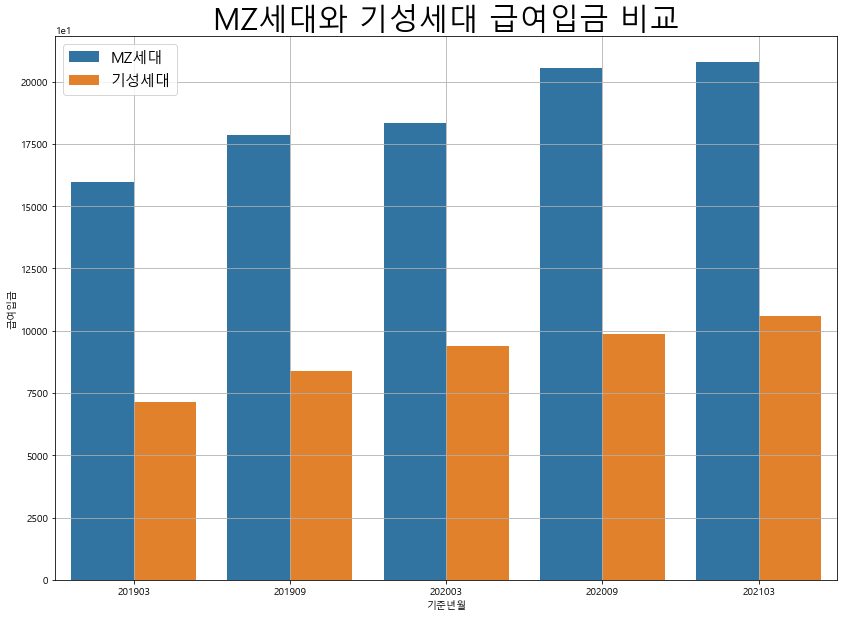

In [17]:
fig=plt.figure(figsize=(14,10))
sns.barplot(x='기준년월',y='급여입금',hue='MZ여부',data=gp_s)
plt.title('MZ세대와 기성세대 급여입금 비교',fontsize=30)
plt.legend(fontsize=15)
plt.ticklabel_format(axis="y", style="sci", scilimits=(1,1))
plt.gca().xaxis.set
plt.grid()
plt.show()

### MZ세대와 기성세대의 평균 급여입금액은 약2배정도 차이가 있다. 하지만 미취직자가 상대적으로 많은 20대가 존재하고 기성세대에도 은퇴한 사람들이 상당수 존재할 것으로 보인다. 따라서 이를 좀더 자세히 분석해보기 위해서 나이대별로 Grouping을 실시한다.

In [18]:
gp_s2=df2.groupby(['기준년월','나이'],as_index=False)[['급여입금']].mean()
gp_s2.head(12)

,기준년월,나이,급여입금
0,201903,2,28585.45648
1,201903,3,272614.24829
2,201903,4,165513.84346
3,201903,5,84254.17282
4,201903,6,6271.95208
5,201903,7,1001.53209
6,201909,2,42256.39630
7,201909,3,296849.92325
8,201909,4,196212.36263
9,201909,5,97142.21781


### ▶ 급여입금액의 평균은 " 30대 > 40대 > 50대 > 20대 >60대 " 로 30대가 가장 높은 평균 급여를 받고 있었다. 이는 30대와 40대가 경제활동의 중심임을 밝히고 있다.

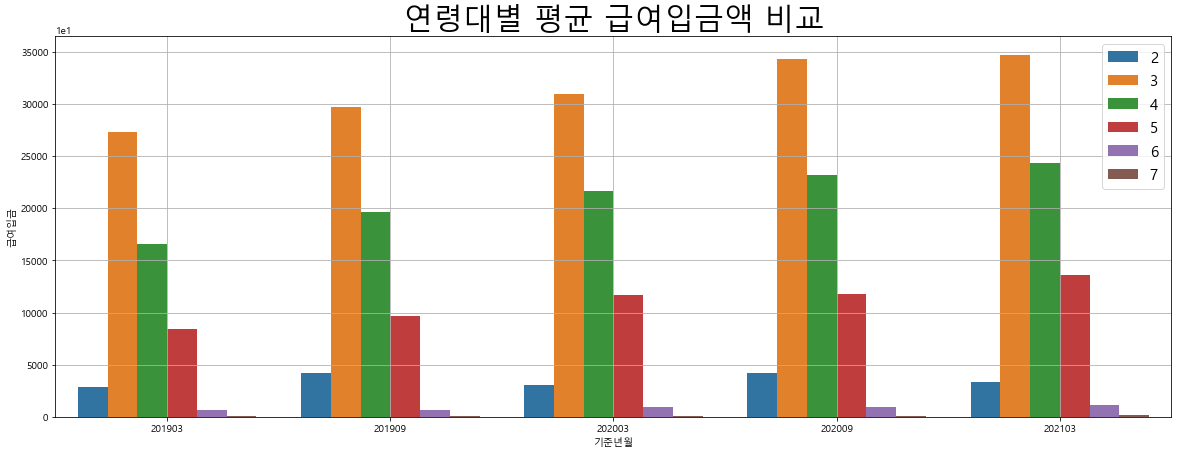

In [19]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()

sns.barplot(x='기준년월',y='급여입금',hue='나이',data=gp_s2)
plt.title('연령대별 평균 급여입금액 비교',fontsize=30)
plt.legend(fontsize=15)
plt.ticklabel_format(axis="y", style="sci", scilimits=(1,1))
plt.grid()
plt.show()


### ▶ 경제활동의 중심이 되는 30대, 40대, 50대에서는 어느정도 시간이 경과해도 평균 급여가 상승하는 모습을 보이고 있다.
### ▶ 대부분 은퇴를 한 나이대인 60대와 70대는 크게 변동하지 않았다.
### ▶ 20대는 3월에는 낮았다가 9월에는 다시 올라가는 변동성을 보이고있다. 9월과 3월 사이의 자료가 없어 어떠한 일이 일어났는지 확실하게 확인할 수 없다. 그러나 현재 안정적이고 활발하게 경제활동을 하고 있는 30대~50대가 지속적으로 상승세를 보였다는 점에서, 20대는 주로 아르바이트와 같은 기간제, 비정규직 비중이 높기 때문인 것으로 보인다.
### ▶ 또한 20대 사회 초년생의 입사후 단기간에 퇴사하는 케이스도 다른 세대에 비해 많다. 
### ▶결론적으로, 20대는 경제적으로 불안정한 경우가 많고 30대는 기성세대보다도 경제적으로 안정되어있고 경우에 따라 가장 가용할 수 있는 현금이 많다고 볼 수 있다.



## ◆소비

In [20]:
gp_d=df2.groupby(['기준년월','MZ여부'],as_index=False)[['총소비금액']].mean()
gp_d.head()

,기준년월,MZ여부,총소비금액
0,201903,MZ세대,1112413.58317
1,201903,기성세대,1201620.54400
2,201909,MZ세대,1179094.42972
3,201909,기성세대,1307001.07929
4,202003,MZ세대,1025564.23887


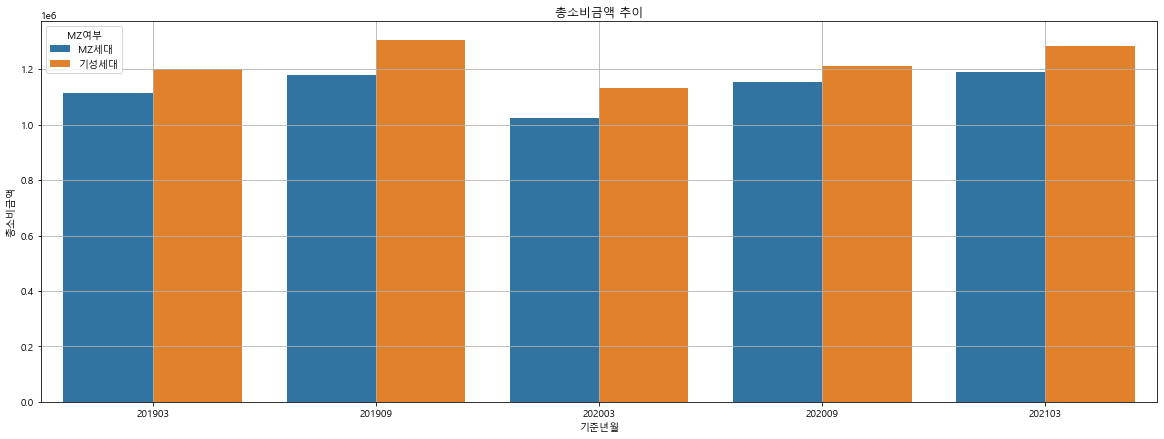

In [21]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()

sns.barplot(x='기준년월',y='총소비금액',hue='MZ여부',data=gp_d)
plt.xlabel('기준년월')
plt.ylabel('총소비금액')
plt.title('총소비금액 추이')
plt.grid()
plt.show()

In [22]:
df2.groupby(['나이'],as_index=False)[['총소비금액']].mean()

,나이,총소비금액
0,2,882690.46437
1,3,1341713.51771
2,4,1501485.35384
3,5,1473872.22607
4,6,1136127.77416
5,7,649979.97253


### ▶기성세대가 MZ세대보다 더 많은 총소비금액을 보이고 있다. 이는 30대 40대 50대가 비슷한 소비규모를 보이고 있다는 점에서 40,50대가 포함되어있는 기성세대가 2배 이상의 규모를 보인 것으로 보인다.

### ▶추세선을 보면 202003년에 동일하게 감소했다가 202009년 이후부터는 증가하는 추세를 보이고 있다. 이는 202003에 코로나의 본격화로 인해 소비심리 위축으로 인한 영향으로 보인다. 2020년 9월부터는 코로나가 본격적으로 장기화되면서 O2O서비스의 이용증가와 코로나의 영향으로 인한 보복소비 등으로 이러한 추세를 보이는 것으로 해석된다.

### ▶ 평균급여액은 MZ세대가 더 높은 반면에 평균 소비금액은 MZ세대, 특히 40대 50대가 가장 높은 비중을 보였다. 40대 50대는 자녀가 있기 때문에 지출액이 1인가구 비중이 높은 MZ세대보다 지출이 높은것으로 보인다.


# ◆금융상품(투자)


In [23]:
gp_i=df2.groupby(['기준년월','MZ여부'],as_index=False)[['총수신금액','예적금금액','신탁금액','수익증권금액']].mean()
gp_i

,기준년월,MZ여부,총수신금액,예적금금액,신탁금액,수익증권금액
0,201903,MZ세대,2936660.33472,3002589.33477,45618.28192,34073.39493
1,201903,기성세대,4618571.85317,3980689.95570,827244.08121,346168.76424
2,201909,MZ세대,3033450.59260,3040805.52035,58077.48465,35374.70879
3,201909,기성세대,4614266.00446,3766719.20798,816059.23784,357904.36599
4,202003,MZ세대,3201088.01305,3135039.86398,56668.02400,30900.71801
5,202003,기성세대,4801303.96656,3917564.74899,845333.62245,316758.23208
6,202009,MZ세대,3436684.57110,3216421.16172,52638.42795,27994.65191
7,202009,기성세대,5041612.64936,3832771.06975,743317.31917,325867.14287
8,202103,MZ세대,3454914.30369,3051073.27851,46614.28642,19649.82945
9,202103,기성세대,5066030.40522,3649818.11194,697776.22865,283115.41948


### ● 총수신금액

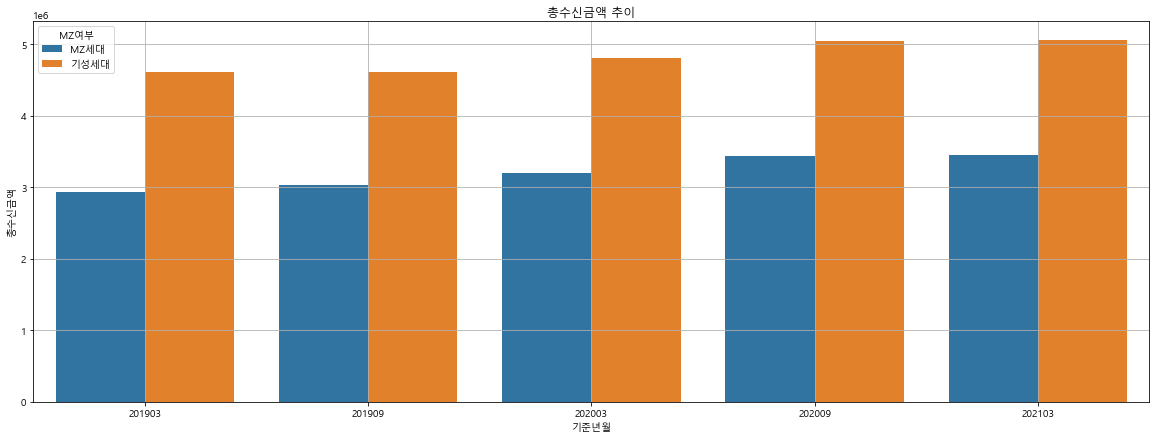

In [24]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


sns.barplot(x='기준년월',y='총수신금액',hue='MZ여부',data=gp_i)
plt.xlabel('기준년월')
plt.ylabel('총수신금액')
plt.title('총수신금액 추이')
plt.grid()
plt.show()

### ▶앞선 총소비금액과 더불어 총 수신금액도 기성세대가 더 높았다. 총수신금액이 은행의 모든 수신상품의 합이라는 점을 감안하면, 기성세대가 MZ세대보다 은행 상품을 더 적극적으로 활용한다는 것을 확인할 수 있다.


### ●예적금금액

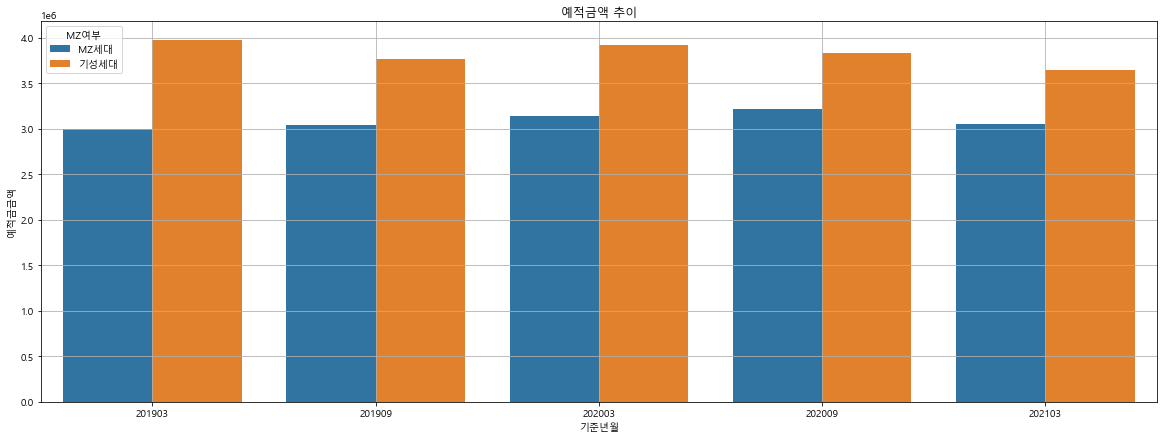

In [25]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


sns.barplot(x='기준년월',y='예적금금액',hue='MZ여부',data=gp_i)

plt.xlabel('기준년월')
plt.ylabel('예적금금액')
plt.title('예적금액 추이')
plt.grid()

plt.show()

### ●신탁금액

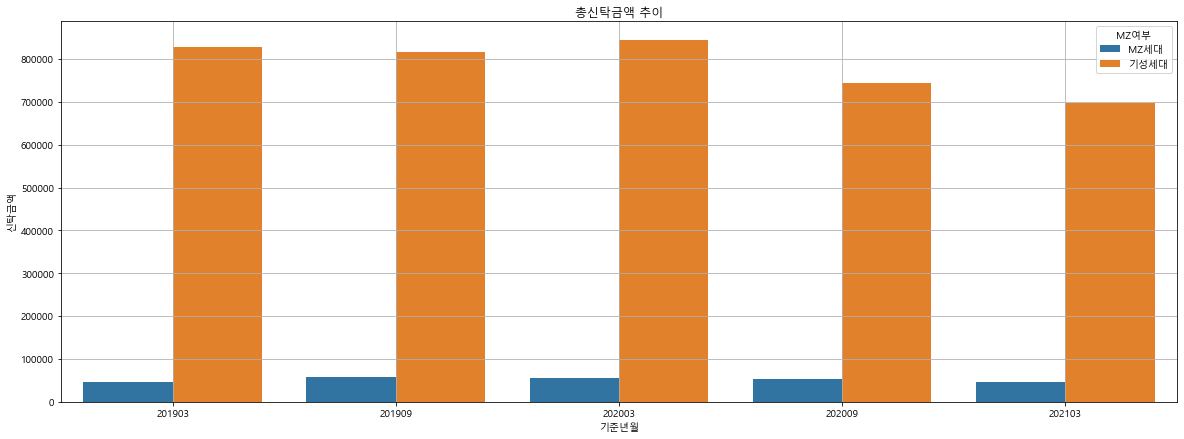

In [26]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()

sns.barplot(x='기준년월',y='신탁금액',hue='MZ여부',data=gp_i)

plt.xlabel('기준년월')
plt.ylabel('신탁금액')
plt.title('총신탁금액 추이')
plt.grid()
plt.show()

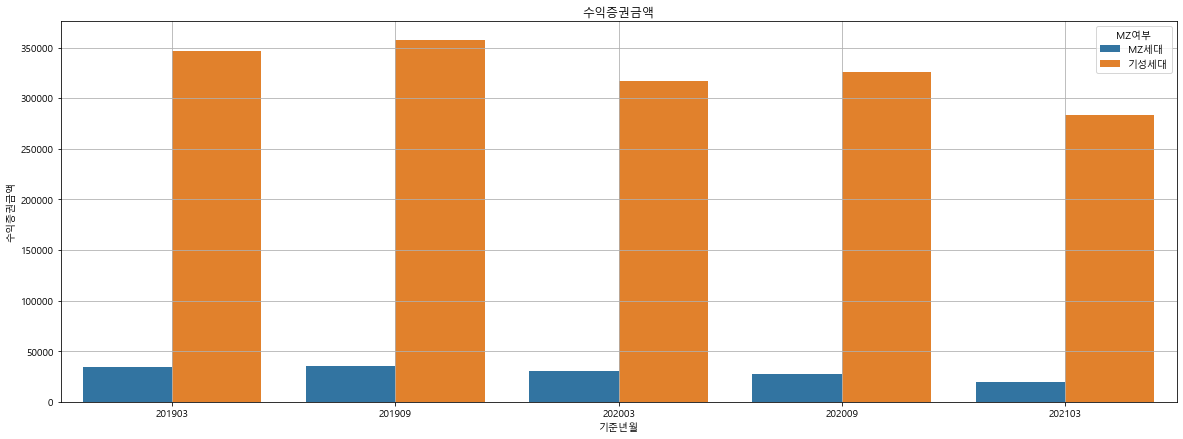

In [27]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()

sns.barplot(x='기준년월',y='수익증권금액',hue='MZ여부',data=gp_i)


plt.xlabel('기준년월')
plt.ylabel('수익증권금액')
plt.title('수익증권금액')
plt.grid()

plt.show()

### ▶전반적인 MZ세대의 금융자산에 관한 항목 추이를 보면 수익증권이나 신탁금액은 . 이는 MZ세대가 은행을 통한 금융상품 투자보다는 증권사를 통해 직접 코인이나 주식을 투자하기 때문으로 보인다. 
### ▶특히 예적금 금액은 총 수신금액과 비슷한 형태를 보이고 있는데 21년 3월에는 20년 9월에 비해 예적금 금액이 감소한 것을 확인할 수 있다. 
### ▶이 또한 저금리로 인해 예적금으로 인한 수익률이 저하되고 MZ세대가 더 높은 수익을 얻을 수 있는 재태크를 찾아나섰기 때문에 이러한 추세를 보인다고 볼 수 있다.

### ▶ 전반적으로 급여수준에 비하면 MZ세대의 평균 은행 수신상품 이용량이 전반적으로 낮다. 이들이 적극적으로 투자할 수 있도록 유도 방안이 필요하다.

# ◆금융상품(대출)


In [28]:
gp_l=df2.groupby(['기준년월','MZ여부'],as_index=False)[['신용대출금액','담보대출금액','주택대출금액','전세자금대출금액']].mean()
gp_l

,기준년월,MZ여부,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,MZ세대,293420.41714,1321499.11181,17150.44921,391918.35303
1,201903,기성세대,244447.08996,2009164.72759,196468.86555,27147.19059
2,201909,MZ세대,372462.36405,1423675.83654,17702.29893,453136.35049
3,201909,기성세대,274348.86971,1908864.37915,169420.04473,14777.49222
4,202003,MZ세대,458979.04385,1835782.55320,29659.03196,750813.28299
5,202003,기성세대,357778.83817,1848711.33864,270053.94676,13763.71673
6,202009,MZ세대,633494.34068,2358266.17079,38798.76916,898132.59236
7,202009,기성세대,412469.78783,1914845.35947,243772.62913,28781.53771
8,202103,MZ세대,744406.23246,2999018.94673,47457.95270,1212808.59411
9,202103,기성세대,489276.16745,2071392.33383,254680.33034,45407.40439


### ● 신용대출금액

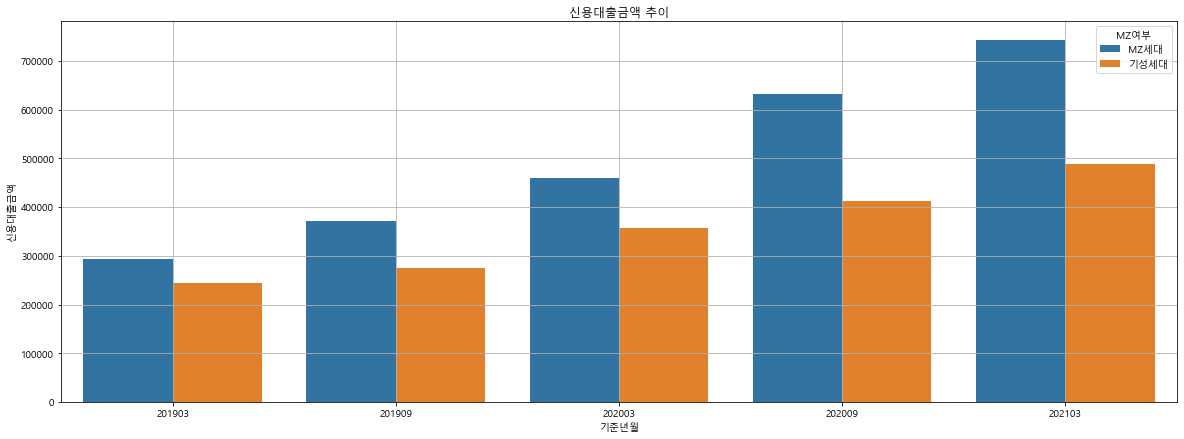

In [29]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()




sns.barplot(x='기준년월',y='신용대출금액',hue='MZ여부',data=gp_l)



plt.xlabel('기준년월')
plt.ylabel('신용대출금액')
plt.title('신용대출금액 추이')
plt.grid()
plt.show()

### ● 담보대출금액

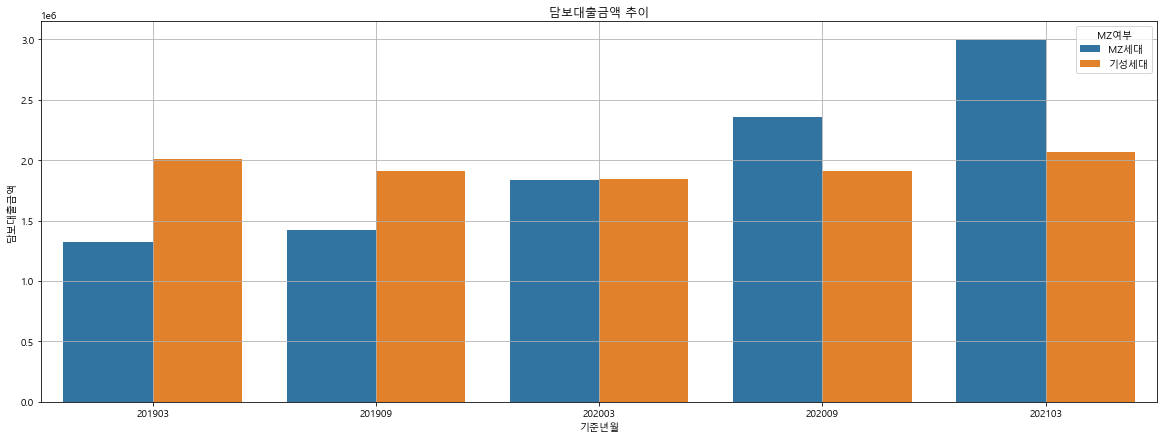

In [30]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


sns.barplot(x='기준년월',y='담보대출금액',hue='MZ여부',data=gp_l)

plt.xlabel('기준년월')
plt.ylabel('담보대출금액')
plt.title('담보대출금액 추이')
plt.grid()
plt.show()

### ▶ MZ세대의 평균 담보대출금액이 202003월 코로나 이후에 기성세대보다 높아졌다. 담보대출금액이 전세대출금액과 주택담보대출을 포함하고 있는 칼럼이라는 점에서  MZ세대의전세자금대출이 지속적으로 증가하면서 역전현상이 발생한 것으로 보인다. 

### ● 전세자금대출금액

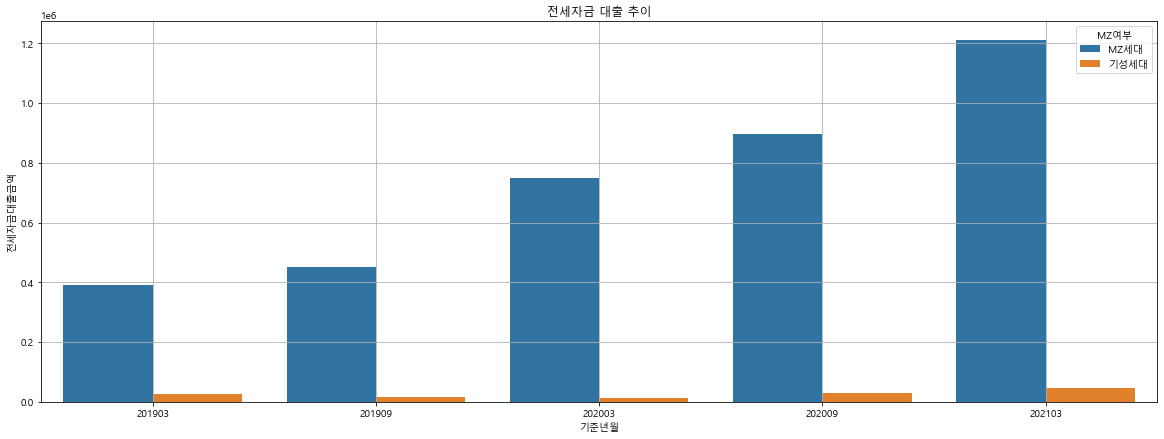

In [31]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()

sns.barplot(x='기준년월',y='전세자금대출금액',hue='MZ여부',data=gp_l)

plt.xlabel('기준년월')
plt.ylabel('전세자금대출금액')
plt.title('전세자금 대출 추이')
plt.grid()
plt.show()

### ● 주택대출금액

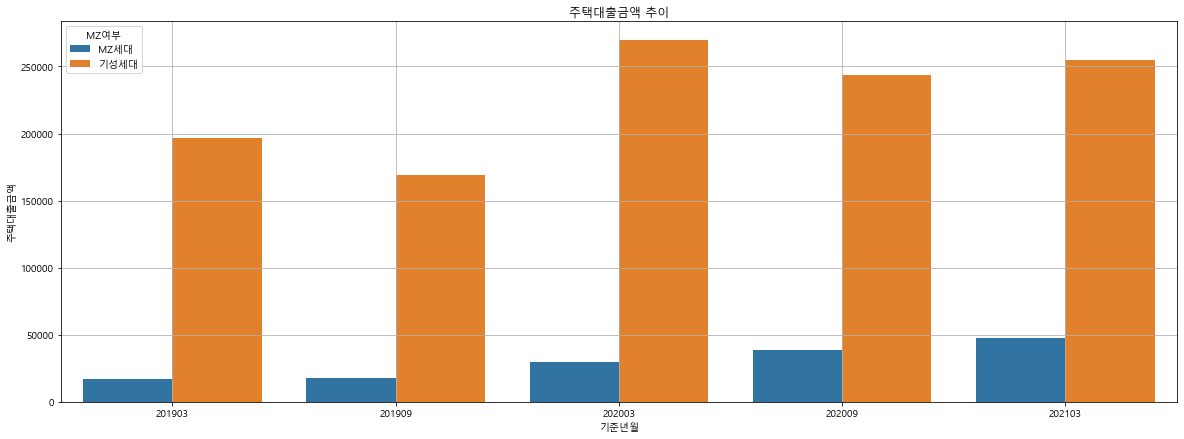

In [32]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()

sns.barplot(x='기준년월',y='주택대출금액',hue='MZ여부',data=gp_l)

plt.xlabel('기준년월')
plt.ylabel('주택대출금액')
plt.title('주택대출금액 추이')
plt.grid()
plt.show()

### ▶대출상품과 관련된 MZ세대와 기성세대의 차이를 보면 전반적으로 양 세대 모두 규모의 차이가 있지만 대출의 비중이 늘어나고 있다. 이는 코로나 여파로 인한 저금리와 실직 등과 같은 가계의 재정적 부담이 가중되면서 발생한 것으로 보인다.


### ▶ 규모측면에서는 MZ세대는 전세자금대출이 기성세대는 주택대출금액에서 큰 차이를 보였는데 이는 상대적으로 안정적인 기성세대는 자가의 형태로 부동산을 소요하고있고 MZ세대는 전세 형식으로 집을 구하려 한다는 것을 알 수 있다. 

### ▶ MZ세대의 전세자금 대출 규모가 점점 증가하고 있다. 이는 부동산 가격의 증가의 영향으로 해석할 수 있다.


### ▶ 대출금액은 지속적으로 증가하고 있고 그 규모가 커지고 있다. 그러나 MZ세대가 은행으로 수신하는 금액은 기성세대에 비해 낮다.  이는 결국 은행으로부터 지속적으로 돈이 유출되고 있다는 것이고 이를 해결할 방안이 필요할 것으로보인다.

### ▶ MZ세대는 전반적으로 평균 급여소득이 기성세대보다 높다. 또한 평균 소비금액이 기성세대와 MZ세대 간 큰 차이가 발생하지 않았다는 점에서 신용 또는 체크 카드를 사용하는 양은 차이가 없다. 그러나 예적금금액을 제외한 나머지 모든 부분에서 은행상품을 이용하는 MZ세대의 비중이 지나치게 낮다는 것을 확인할 수 있다.

### ▶ 이는 MZ세대의 재태크에 대한 관심도가 증가하고 있지만 이를 시중은행을 통한 재태크를 선호하지 않는다는 것을 의미한다.

# ◆ 클러스터링을 통한 특성분류

## ◆데이터 준비

kmeans 군집분석을 사용해서 MZ세대의 특징을 찾아내고자한다.

코로나 이후의 MZ세대의 특징을 분류하기 위해 가장 최신의 데이터인 21년03월 데이터를 이용해서 분류하고자 함. 

앞선 시각화 분석 단계에서 MZ세대의 데이터는 코로나 이후 큰 증감이 없었다. 
 

In [33]:
df3=df2.loc[(df2.기준년월==202103)&(df2.MZ여부=='MZ세대'),]

In [34]:
mz=df3.drop(['기준년월','MZ여부'],axis=1).reset_index(drop=True)

In [35]:
mz

,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,강남구,역삼동,2,1,0,0,0,0,2281097,5125045,0,0,0,0,0,0,0
1,강남구,역삼동,2,2,0,0,0,0,1365430,1145088,0,0,0,0,0,0,0
2,강남구,역삼동,3,1,0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0
3,강남구,역삼동,3,1,1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0
4,강남구,역삼동,3,2,0,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71630,중랑구,신내동,2,2,0,0,0,0,1224559,2568044,5111428,0,0,0,0,0,0
71631,중랑구,신내동,3,1,0,0,0,0,2563707,4085287,6097368,0,0,0,0,0,0
71632,중랑구,신내동,3,1,1,2858405,0,0,1433172,7721884,0,0,0,0,0,0,0
71633,중랑구,신내동,3,2,0,0,0,0,1653606,2489795,10358065,0,0,0,0,0,0


## ◆파생변수 생성




#### ※ 총 수신 값이 있지만, 총소비가 0인 경우는 입출금통장에 입금하고 해당 월에 지급이 없는 저축용도 통장이거나 입출금 통장 없이 예금, 적금만 하는 고객일 수 있다.

#### ※ 총수신은 입출금통장 포함이기 때문에 대부분의 사람이 총수신 값을 가지고 있으며 잔액이 30만원 등과 같이 작은 경우가 많습니다. 그러나 예금, 투자 상품은 상대적으로 큰 금액으로 가입하기 때문에 총수신은 예금, 투자 상품의 평균 값보다 작게 나올 수 있다.

### ▶신한 은행 데이터 컬럼에 대한 데이터 설명을 참고하여 이와 관련된 파생변수를 생성한다.

### ▶ 총 수신금액을 총수신금액과 관련된 컬럼(예적금금액,신탁금액, 수익증권금액) 및 총소비금액을 비교해서 더 높은 경우 1 아니면 0으로 하는 파생변수를 생성

In [36]:
print('입출금통장:',mz.loc[(mz.총소비금액==0)&(mz.총수신금액!=0),'총수신금액'].count())
print('예적금통장:',mz.loc[mz.총수신금액 < mz.예적금금액,'총수신금액'].count())
print('신탁투자통장:',mz.loc[mz.총수신금액 < mz.신탁금액,'총수신금액'].count())
print('수익증권투자통장:',mz.loc[mz.총수신금액 < mz.수익증권금액,'총수신금액'].count())

입출금통장: 17104
예적금통장: 27804
신탁투자통장: 99
수익증권투자통장: 62


### ▶ 총소비금액이 0이지만 총수신금액이 0이 아닌 경우가 17104건으로 이를 '저축용도'라는 파생변수를 생성한다.
### ▶ 예적금금액이 총소비금액보다 큰 경우가 27804건으로 이를 '예적금용도'라는 파생변수로 생성한다.

In [37]:
mz2=mz.copy()
mz2['저축용도']=np.nan
mz2['예적금용도']=np.nan
mz2['저축용도']=np.where((mz.총소비금액==0)&(mz.총수신금액!=0),1,0)
mz2['예적금용도']=np.where(mz.총수신금액 < mz.예적금금액,1,0)
mz2.head(15)

,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,강남구,역삼동,2,1,0,0,0,0,2281097,5125045,0,0,0,0,0,0,0,0,0
1,강남구,역삼동,2,2,0,0,0,0,1365430,1145088,0,0,0,0,0,0,0,0,0
2,강남구,역삼동,3,1,0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0,0,1
3,강남구,역삼동,3,1,1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0,0,0
4,강남구,역삼동,3,2,0,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0,0,1
5,강남구,역삼동,3,2,1,2195453,0,0,1930210,7077029,7914375,0,0,0,0,0,0,0,1
6,강남구,역삼동,2,1,0,0,0,0,1838629,7328443,8146428,0,0,0,0,0,0,0,1
7,강남구,역삼동,2,2,0,0,0,0,1288101,3137815,0,0,0,0,0,0,0,0,0
8,강남구,역삼동,3,1,0,0,0,0,2950305,3935387,0,0,0,0,0,0,0,0,0
9,강남구,역삼동,3,1,1,3234454,0,0,2877165,9296154,0,0,0,0,0,0,0,0,0


In [38]:
z=mz2.loc[mz2.나이==2] #20대만 추출
m=mz2.loc[mz2.나이==3] #30대만 추출

In [39]:
z1=z.drop(['나이'],axis=1).reset_index(drop=True) #나이컬럼 삭제
m1=m.drop(['나이'],axis=1).reset_index(drop=True) #나이컬럼 삭제

## ◆기술통계량 확인

In [40]:
z1.loc[:,'급여입금':].describe()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
count,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000,31825.00000
mean,33420.10369,0.00000,28.85222,914647.00528,2450412.95007,2082060.34778,4311.73307,12358.55994,47012.27362,557484.92892,0.00000,409054.78781,0.29807,0.37668
std,282213.93921,0.00000,2972.38656,746562.82778,1986358.97828,2915432.81663,261292.96766,483218.05876,1252838.37417,7112779.59786,0.00000,6407818.28557,0.45742,0.48456
min,0.00000,0.00000,0.00000,0.00000,1378.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,1076467.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,967050.00000,1925587.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000,1428170.00000,3252170.00000,3616666.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,4277427.00000,0.00000,316000.00000,4757358.00000,20578259.00000,30087627.00000,33275268.00000,33707900.00000,54486571.00000,179283750.00000,0.00000,177822222.00000,1.00000,1.00000


In [41]:
m1.describe()

,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
count,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000,39810.00000
mean,1.50342,0.11083,347158.48001,802.25878,24.10937,1412818.15501,4257935.04167,3825723.78141,80431.88905,25478.63258,1301918.48415,4950835.57865,85396.89631,1855347.27498,0.19136,0.39729
std,0.49999,0.31392,1010353.12307,72188.23040,2779.95076,923114.13743,3399653.81226,4583768.70738,996100.89924,615317.66452,8196035.56884,23534329.59369,4512159.18297,15240652.50228,0.39338,0.48934
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1592.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,0.00000,0.00000,840548.50000,2005464.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2.00000,0.00000,0.00000,0.00000,0.00000,1473846.00000,3317844.00000,2728348.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2.00000,0.00000,0.00000,0.00000,0.00000,2032513.75000,5353378.00000,6452124.75000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
max,2.00000,1.00000,6789297.00000,9607760.00000,331904.00000,5489070.00000,31377244.00000,40105664.00000,44361232.00000,51505747.00000,108276096.00000,336999920.00000,322639172.00000,232285714.00000,1.00000,1.00000


MZ세대의 기술통계량을보면 30대와 20대 간 절대적인 규모의 차이가 존재했다. 따라서 20대와 30대를 구분하는 것은 큰 의미가 없다. 대신 20대와 30대를 따로 나누어서 클러스터링을 하여 특징을 추출한다.

In [42]:
z_clustering=z1.loc[:,'급여입금':] # 클러스터링을 위한 변수 추출
z_clustering

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,0,0,0,2281097,5125045,0,0,0,0,0,0,0,0,0
1,0,0,0,1365430,1145088,0,0,0,0,0,0,0,0,0
2,0,0,0,1838629,7328443,8146428,0,0,0,0,0,0,0,1
3,0,0,0,1288101,3137815,0,0,0,0,0,0,0,0,0
4,0,0,0,1434746,1028505,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31820,0,0,0,0,1212992,0,0,0,0,0,0,0,1,0
31821,0,0,0,0,2733757,3834444,0,0,0,0,0,0,1,1
31822,0,0,0,1586835,1224723,0,0,0,0,0,0,0,0,0
31823,0,0,0,766656,2051080,4573152,0,0,0,0,0,0,0,1


## ◆데이터 표준화

In [43]:
sc=StandardScaler() #표준화
z_clustering_sc=sc.fit_transform(z_clustering)

## ◆ Kmeans 모델 생성(20대)

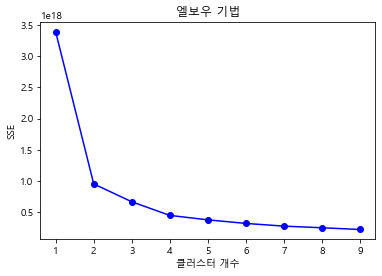

[3.3926142780377006e+18, 9.518151380712452e+17, 6.64963158258222e+17, 4.461562546270849e+17, 3.750402210737274e+17, 3.174160626215341e+17, 2.7390309613516525e+17, 2.478758601549737e+17, 2.1996310101234768e+17]


In [44]:
def elbow(data,length):
    sse=[] #오차제곱합
    for i in range(1,length):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,length),sse,'bo-')
    plt.title('엘보우 기법')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(z_clustering,10)

kmeans 클러스터링은 임의의 점을 찍고(첫 중심점) 이를 기반으로 평균 거리가 가까운 변수들끼리 클러스터링한다. 그 이후 중심점을 다시 계산하여 분류를 실시. 이를 계속 반복해서 유사한 성질을 가지고 있는 클러스터를 만들어낸다.

최적의 클러스터링 갯수를 찾기 위한 엘보우 기법 => 오차제곱합의 값이 최소가 되도록 결정하는 방법 kmeans의 inertia_ inertia value는 군집화가 된 후 각 중심점에서 군집의 데이터 간의 거리를 합산한것. 즉 군집의 응집도를 나타낸다. 이 값이 작을 수록 높게 군집화가 되어있다는 것을 의미한다. 따라서 inertia값이 감소하는 정도가 낮아지는 지점이 최적의 k값이 된다 따라서 z세대의 적절한 k값은 4다.

## ◆ Kmeans 군집분석 (20대)

In [45]:
kmeans=KMeans(n_clusters=4,random_state=1)
clusters=kmeans.fit(z_clustering_sc)
z_clustering['cluster']=clusters.labels_
# print(z_clustering['cluster'].unique())
z_clustering
z_clustering.groupby('cluster').count()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245
1,148,148,148,148,148,148,148,148,148,148,148,148,148,148
2,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334
3,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098


In [46]:
z_clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,32614.75811,0.00000,26.67852,1304855.42766,2181844.93108,424326.41156,0.00000,243.41618,1632.73446,132296.18746,0.00000,2237.66118,0.00000,0.00000
1,2037470.66892,0.00000,0.00000,2192121.50000,5871907.04054,4475553.99324,544317.45270,144696.02703,9841295.14865,89889037.06081,0.00000,85961994.39865,0.00000,0.22297
2,34877.02365,0.00000,54.54579,1245024.49947,3172043.12352,4937953.03714,4999.28728,32570.93197,1878.75657,260341.42845,0.00000,23877.79698,0.03423,0.95041
3,0.00000,0.00000,0.00000,0.00000,1827716.73796,534279.88085,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.13003


## 3번 클러스터
### 3번 클러스터는 총 소비금액이 0이기 때문에 주거래은행은 타 은행이고 신한은행에는 소액이 들어있는 계좌 또는 예적금 상품만 이용하고 있는 그룹이다.

### => 20대 취업자들이 주거래 은행으로 만들 수 있도록 유도 방안이 필요하다. (휴면계좌를 대상으로 come-back 이벤트, 휴면계좌 주기적으로 입출금 사용시 페이백, 1년이상 입출금 내역 미보유자 우대프로그램, 수익증권 우대 프로그램을 통해 적극적으로 신한은행 계좌를 사용하도록 유도)

### => 주거래 은행이 아니면 소액만 들어있는 통장이 여러개인 케이스 => 휴면 계좌 활성화 방안 => 예적금 또는 저축용 -> 금융상품을 활용할 수 있도록 유도

## 1번
### 1번 클러스터는 20대 직장인그룹으로 종류는 적지만 직장인들로 구성된 그룹이기 때문에 전반적으로 그 규모가 다른 그룹보다 크다. 이들은 규모가 더크고 자산운용에 자율성이 더 높은 수익증권(펀드)보다 신탁상품을 더 선호하는 것으로 나타났다. 이들은 수는 적지만 다른 그룹에비해 더 많은 자산을 신한은행을 통해 운영하고 있다. 다만 투자 및 예적금 금액에 비해 담보대출금이 매우 높은데 전세자금대출액이 담보대출금액의 일부인점을 고려한다면, 부동산 상승의 영향으로 인해 대출 부담이 높은 것으로 보인다. 또한 높은 대출금액은 자칫하면 파산으로 이어질 수 있기 떄문에 적절한 대출 관리 수단이 필요하다.

## 0번과 2번
### 0번 클러스터와 2번클러스터는 급여와 총소비는 큰 차이를 보이지 않았지만 나머지에서는 차이를 보였다. 2번그룹은 적극적으로 은행 상품을 활용하고 있는 반면에 0번클러스터는 이 부분에 있어서 소극적이라고 볼 수 있다. 2번클러스터는  재태크도 적극적으로 하는 그룹


In [63]:
z2=z1.copy()

z2['cluster']=z_clustering['cluster']


---

### ◆ 클러스터를 좀더 세부적으로 보기 위해 성별로 grouping

##### 전반적으로 남성과 여성의 숫자 비율이 크게 차이가 1번클러스터를 제외하면 크게  차이가 나지 않았다. 1번클러스터는 다른 클러스터보다 급여입급액이 월등히 높다는 점에서 안정적인 일자리를 확보한 그룹임을 알 수 있는데  여성의 숫자가 남성의 숫자보다 더 높다는 것을  보아, 20대그룹에서는 상대적으로 남성보다 빠른  나이에 취직하는 여성들의 평균 급여입금액이 더  높기 때문이다.

In [71]:
z2.groupby(['cluster','성별'],as_index=False).count()# 2번 클러스터

,cluster,성별,지역구,법정동,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,0,1,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782
1,0,2,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463,6463
2,1,1,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
3,1,2,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
4,2,1,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462,5462
5,2,2,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872
6,3,1,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820
7,3,2,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278


In [70]:
z2.groupby(['cluster','성별'],as_index=False).mean()# 2번 클러스터

,cluster,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,0,1,0.00544,11651.83166,0.00000,0.00000,1381507.90318,1905847.67545,321101.48076,0.00000,572.39962,0.00000,152195.06315,0.00000,0.00000,0.00000,0.00000
1,0,2,0.02228,48125.31270,0.00000,46.41807,1248139.94909,2386056.42364,500702.95791,0.00000,0.00000,2840.80133,117572.92836,0.00000,3893.31580,0.00000,0.00000
2,1,1,0.75000,2116880.91667,0.00000,0.00000,2366747.50000,5829800.16667,5003213.41667,2772939.00000,904326.58333,6785717.00000,90273504.41667,0.00000,65928341.50000,0.00000,0.33333
3,1,2,0.81618,2030463.88235,0.00000,0.00000,2176713.32353,5875622.35294,4428995.80882,347674.37500,77669.80147,10110904.98529,89855113.47059,0.00000,87729669.65441,0.00000,0.21324
4,2,1,0.00531,11829.42384,0.00000,57.85427,1246098.35774,2924779.23856,4944943.17503,0.00000,33175.62596,1687.85170,145365.32040,0.00000,9760.94562,0.04980,0.96723
5,2,2,0.02452,56315.37347,0.00000,51.46832,1244025.62108,3402042.32987,4931450.97088,9649.50988,32008.45947,2056.33191,367289.57255,0.00000,37008.96901,0.01975,0.93478
6,3,1,0.00000,0.00000,0.00000,0.00000,0.00000,1659208.88952,580656.24897,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.14519
7,3,2,0.00000,0.00000,0.00000,0.00000,0.00000,2126897.84777,451939.89841,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.10311


#### ◆ 0번과 2번 클러스터

##### 0번과2번 클러스터는 주어진 데이터에서 가장 높은 비중을 차지하고 있는 그룹으로 급여와 총소비에서 큰 차이를 보이지 않았지만 전반적인 금융상품이용에 있어서 차이를 보인 그룹이다.

##### 0번클러스터는 남녀모두 신탁금액과 수익증권 금액을 고려했을 때 은행에서 제공하는 금융상품에 관심도가 낮은 것을 확인할 수 있다. 그러나 담보대출 금액이 높은데 이중 전세자금 대출금액이 차지하는 비중이 남성은 0이고 여성은 3893이라는 점에서  대출금액이 주거문제를 해결하기 위한 용도가 아님을 알 수 있다. 
##### ▶ 최근 MZ세대를 중심으로 영끌, 빛투와 같은 위험성 높은 투자를 위함이거나 혹은 대학생 학자금과 관련된 대출이 관련이 있을 것으로 예상된다. 
##### ▶ 2번클러스터는 급여는 남여 차이가 컸지만 총소비금액은 거의 유사했다. 또한 수익증권금액은 오히려 여성보다 높은 경향을 보였다. 

##### ▶안정된 직장을 가지고 있어 높은 급여를 받는 것으로 추측되는 1번클러스터는 남성이 여성보다 평균급여가 더 높았다. 하지만 1번클러스터는 다른 클러스터에 비해 금융 자산 규모가 전반적으로 더 컸다. 또한 신탁금액과 수익증권 금액이 여성보다 훨씬 컸는데, 이를 고려하면 남성이 여성보다 더 적극적으로 투자를 선호하는 경향이 있고 급여가 안정적일수록 신탁금액에 대한 투자가 증가하는 것으로 보인다. 

##### ▶ 전반적으로 담보대출 금액이 존재하는 클러스터에서 여성의 전세자금대출금액이  그 규모가 남성보다 크다. 또한 1번클러스터의 경우 담보대출 금액과 전세자금 대출금액이 유사한 크기를 보였다. 이는 안정적인 직장을 확보할수록 주택을 구하기위해서이며, 여성이 전세(주택)을 구하는데  더 적극적이거나 은행 자본을 활용한다는 것을 의미한다.

##### ▶ 급여가 상승할수록(삶이 안정화될수록) 은행상품에 대한 관심이 증가한다. 그러나 대부분 남성들이며 여성들의 증가율은 낮은편에 속했다.

 

## ◆ Kmeans 군집분석  시각화 (20대)

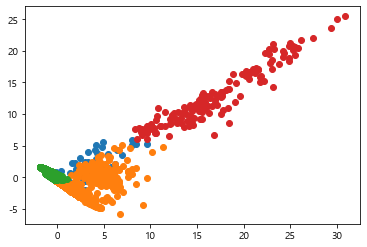

In [52]:
X=z_clustering_sc
pca=PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df
pca_df['cluster']=z_clustering['cluster']

%matplotlib inline

for i in z_clustering['cluster'].unique():
    tmp=pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

## ◆ Kmeans 군집분석 (30대)

In [53]:
m_clustering=m1.loc[:,'급여입금':]
m_clustering

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0,0,1
1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0,0,0
2,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0,0,1
3,2195453,0,0,1930210,7077029,7914375,0,0,0,0,0,0,0,1
4,0,0,0,2950305,3935387,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39805,0,0,0,0,7207308,0,0,0,0,0,0,0,1,0
39806,0,0,0,2563707,4085287,6097368,0,0,0,0,0,0,0,1
39807,2858405,0,0,1433172,7721884,0,0,0,0,0,0,0,0,0
39808,0,0,0,1653606,2489795,10358065,0,0,0,0,0,0,0,1


## ◆ 데이터 표준화

In [54]:
m_clustering_sc=sc.fit_transform(m_clustering)

## ◆ Kmeans 모델 생성(30대)

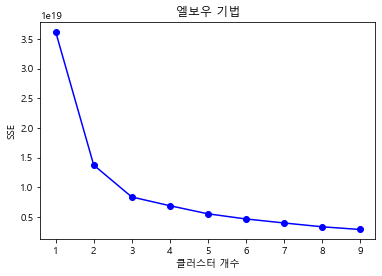

[3.6206059548340085e+19, 1.3727078746782005e+19, 8.346522680203005e+18, 6.874226153825968e+18, 5.509396835330998e+18, 4.63780965683048e+18, 3.9639944414368686e+18, 3.320194009899267e+18, 2.860861374620206e+18]


In [55]:
def elbow(data,length):
    sse=[] #오차제곱합
    for i in range(1,length):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,length),sse,'bo-')
    plt.title('엘보우 기법')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(m_clustering,10)

## ◆ Kmeans 군집분석 (30대)

In [56]:
kmeans=KMeans(n_clusters=5,random_state=1)
clusters=kmeans.fit(m_clustering_sc)
m_clustering['cluster']=clusters.labels_
print(m_clustering['cluster'].unique())
m_clustering
m_clustering.groupby('cluster').count()

[1 4 2 0 3]


,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475
1,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523
2,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392
3,778,778,778,778,778,778,778,778,778,778,778,778,778,778
4,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642


In [57]:
m_clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,0.00000,0.00000,0.00000,0.00000,2962028.92227,737079.50515,0.26876,0.00000,0.00000,34950.12936,0.00000,0.00000,1.00000,0.09231
1,9769.04751,0.00000,0.00000,1616926.89224,3850785.39000,7416820.68574,22297.72278,6427.98044,125578.16429,3580851.23115,0.00000,116812.97686,0.00971,0.99766
2,19886.04674,0.00000,0.00000,1612752.66271,3270955.03883,618039.44713,6484.57967,0.00000,19444.09483,872212.00829,0.00000,15643.61358,0.00000,0.00000
3,2713572.57198,41051.31362,0.00000,2469416.04627,9454489.16452,6519933.23779,2831573.01157,1102672.18380,26326186.75578,115254609.28920,4369730.64524,91728813.74036,0.00129,0.16324
4,3102973.58951,0.00000,263.53487,2537746.33498,11060419.86436,7064419.35283,161547.60351,17317.91433,8034990.26908,11937962.79434,0.00000,162104.28089,0.00027,0.14003


# 0번클러스터

20대 3번클러스터와 유사하다.  총소비금액이 없고 총수신금액과 예적금 금액만이 존재한다.  담보대출 금액이 다소 있긴한데, 다른 클러스터에 비하면 매우 낮은편, 이 그룹또한 주거래 은행이 별도로 있거나 저축용도로 사용하는 그룹.
20대와 30대 모두 비슷한 비율로 이러한 그룹이 존재하고 있다. 

#  1번과 2번클러스터
1번클러스터와 2번클러스터는 급여입금액에 차이가 컸지만 총 소비금액은 유사한 수준으로 나타났다.  1번 클러스터는 은행상품을 적극적으로 활용하지만 2번클러스터는 적극적으로 활용하지는 않았다.


# 3번과 4번클러스터

3번클러스터는 소수그룹 / 하지만 20대와는 달리 3번클러스터가 규모가 더 컸다. 


4번클러스터는 급여입금액이 크고 총소비금액과 총수신금액은 3번클러스터와 유사하다. 하지만 은행상품은 3번클러스터에 비해 많이 낮은편에 속한다. 그러한 4번클러스터가 예적금금액이 높은것은 급여가 높기 때문으로 추측, 다만 수익증권 금액에 비해 신탁금액 상당히 높은것을 볼 수 있는데 이는 상대적으로 수동적인 수익증권금액(펀드)보다 자산관리사를 통해 능동적으로 자산을 관리할 수 있는 신탁 상품을 많이 선호한다는 것을 알 수 있다. 

3번클러스터는 자영업자 + 고소득자 
3번클러스터와 4번클러스터가 규모의 차이는 존재하지만 비슷한 추세를 보였다. (신탁 선호) => 주택대출금액/ 담보대출금액이 높다.
=> 기혼자? (외부자료를 참고할 필요가 있어보인다)

In [78]:
m2=m1.copy()

m2['cluster']=m_clustering['cluster']

In [79]:
m2.loc[(m2.cluster==1)|(m2.cluster==2),].groupby(['cluster','성별'],as_index=False).mean()#30대 1번2번 클러스터 남녀 자산 정보 평균

,cluster,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,1,1,0.00173,4235.04193,0.00000,0.00000,1671220.90865,3434347.64294,7001210.41888,14347.59193,5498.97810,181116.71023,5530551.88271,0.00000,89887.08775,0.01110,0.99928
1,1,2,0.00673,14833.79744,0.00000,0.00000,1567236.73348,4231911.32494,7797189.30661,29573.72280,7278.20810,74749.00580,1796475.32164,0.00000,141455.68693,0.00844,0.99618
2,2,1,0.00786,18801.20231,0.00000,0.00000,1677495.59013,2876320.08019,429600.76731,4254.92706,0.00000,32686.50702,1431374.06739,0.00000,26805.33647,0.00000,0.00000
3,2,2,0.00985,20904.60996,0.00000,0.00000,1551965.36224,3641478.81280,794965.00652,8578.00623,0.00000,7010.76010,347213.31808,0.00000,5163.84335,0.00000,0.00000


#### 1번클러스터와 2번 클러스터는 급여입금액에 차이가 있지만 총 소비금액은 모두 유사했다. 

#### 1번클러스터는 예적금금액을 비롯한 전반적인 은행상품의 이용이 남녀 구분 없이 높았다.

In [80]:
m2.loc[(m2.cluster==3)|(m2.cluster==4),].groupby(['cluster','성별'],as_index=False).mean()#30대 3번4번 클러스터 남녀 자산 정보 평균

,cluster,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,3,1,0.85847,2911641.03016,53857.98608,0.00000,2507453.71926,9106670.28074,5993780.04408,2119249.82367,487192.61485,30283188.00000,125468944.24362,7468690.35963,93976190.05800,0.00232,0.15313
1,3,2,0.81844,2467556.70605,25144.46686,0.00000,2422170.40634,9886506.27954,7173454.92795,3716331.78386,1867143.92507,21411294.72046,102567639.93660,520590.48127,88937403.96254,0.00000,0.17579
2,4,1,0.98978,3347686.60276,0.00000,377.33774,2577321.98978,10184847.68149,5751141.46094,131277.83894,13709.01442,10736572.04507,17964039.68389,0.00000,138131.18029,0.00000,0.11358
3,4,2,0.97523,2897107.83923,0.00000,167.79778,2504453.16532,11796998.28311,8169219.35895,187012.15774,20353.91507,5762274.35642,6868502.76188,0.00000,182271.74267,0.00051,0.16229


#### 20대 그룹에서는 여성들이 전반적으로 대출금액이 높거나 비슷했는데(클러스터 내에서) 30대그룹에서부터는 남성들이 전반적으로 대출금액이 더 크다.  
#### 또한 30대그룹에서는 여성들의 은행상품(신탁금액,수익증권)규모가 남성들보다 더 컸다.

## ◆ Kmeans 군집분석  시각화 (30대)

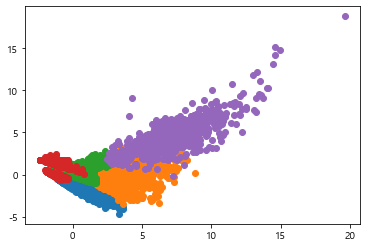

In [58]:
#PCA를 통한 차원 축소
X1=m_clustering_sc
pca=PCA(n_components=2)
pca.fit(X1)
x_pca = pca.transform(X1)
pca_df2 = pd.DataFrame(x_pca)
pca_df2
pca_df2['cluster']=m_clustering['cluster']

#클러스터 시각화
%matplotlib inline

for i in m_clustering['cluster'].unique():
    tmp=pca_df2.loc[pca_df2['cluster']==i]
    plt.scatter(tmp[0],tmp[1])